Logistic Regression Accuracy: 0.4148849797023004
              precision    recall  f1-score   support

           0       0.02      0.40      0.03        52
           1       0.18      0.28      0.22       552
           2       0.87      0.44      0.58      3091

    accuracy                           0.41      3695
   macro avg       0.36      0.37      0.28      3695
weighted avg       0.75      0.41      0.52      3695

Saved Logistic Regression model to models_pickle_file\logistic_regression_model.pkl
Saved Scaler to models_pickle_file\scaler.pkl
Random Forest Accuracy: 0.6081190798376184
              precision    recall  f1-score   support

           0       0.01      0.08      0.02        52
           1       0.16      0.22      0.18       552
           2       0.84      0.69      0.76      3091

    accuracy                           0.61      3695
   macro avg       0.34      0.33      0.32      3695
weighted avg       0.73      0.61      0.66      3695

Fitting 5 folds 

c:\Users\bhuva\Downloads\BCG Job simulation\Road Traffic acc severity project\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
196 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\bhuva\Downloads\BCG Job simulation\Road Traffic acc severity project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\bhuva\Downloads\BCG Job simulation\Road Traffic acc severity project\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\

Best parameters found for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.8365358592692829
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.00      0.00      0.00       552
           2       0.84      1.00      0.91      3091

    accuracy                           0.84      3695
   macro avg       0.28      0.33      0.30      3695
weighted avg       0.70      0.84      0.76      3695

Saved Tuned Random Forest model to models_pickle_file\tuned_random_forest_model.pkl


c:\Users\bhuva\Downloads\BCG Job simulation\Road Traffic acc severity project\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bhuva\Downloads\BCG Job simulation\Road Traffic acc severity project\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bhuva\Downloads\BCG Job simulation\Road Traffic acc severity project\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples

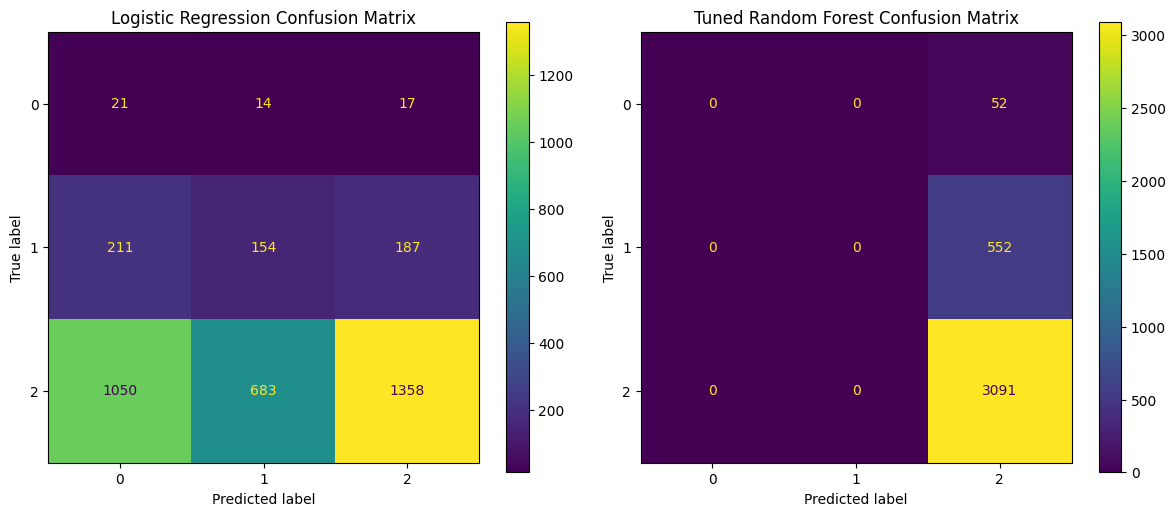

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

# Scikit-learn modules for model building
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# %% Load the dataset
traffic_data_cleaned = pd.read_csv("dataset/cleaned.csv")

# %% Selecting the features and target variable
# Assuming the 5 features required are:
features = ['Age_band_of_driver', 'Driving_experience', 'Weather_conditions', 'Type_of_collision', 'Cause_of_accident']
target = 'Accident_severity'

# Define the feature matrix (X) and target vector (y)
X = traffic_data_cleaned[features]
y = traffic_data_cleaned[target]

# %% Data Preprocessing
# One-hot encoding of categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Step 1: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# %% Model Building
# Create and train Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_regression_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = logistic_regression_model.predict(X_test_scaled)

# Evaluate Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# %% Save the Logistic Regression model and scaler
models_dir = 'models_pickle_file'
os.makedirs(models_dir, exist_ok=True)  # Create directory if it doesn't exist

# Save the Logistic Regression model
model_file = os.path.join(models_dir, 'logistic_regression_model.pkl')
with open(model_file, 'wb') as f:
    pickle.dump(logistic_regression_model, f)

# Save the scaler
scaler_file = os.path.join(models_dir, 'scaler.pkl')
with open(scaler_file, 'wb') as f:
    pickle.dump(scaler, f)

print(f"Saved Logistic Regression model to {model_file}")
print(f"Saved Scaler to {scaler_file}")

# %% Train and evaluate Random Forest model
random_forest = RandomForestClassifier(class_weight='balanced', random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# %% Hyperparameter tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print(f"Best parameters found for Random Forest: {grid_search.best_params_}")

# Use the best model
best_rf_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the tuned Random Forest model
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))

# %% Save the tuned Random Forest model
model_file = os.path.join(models_dir, 'tuned_random_forest_model.pkl')
with open(model_file, 'wb') as f:
    pickle.dump(best_rf_model, f)

print(f"Saved Tuned Random Forest model to {model_file}")

# %% Display confusion matrices for both models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
ConfusionMatrixDisplay.from_estimator(logistic_regression_model, X_test_scaled, y_test, ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")

# Tuned Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test_scaled, y_test, ax=axes[1])
axes[1].set_title("Tuned Random Forest Confusion Matrix")

plt.tight_layout()
plt.show()


In [3]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the training set
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train the Random Forest model on the resampled data
random_forest = RandomForestClassifier(class_weight='balanced', random_state=42)
random_forest.fit(X_resampled, y_resampled)

# Make predictions
y_pred_rf_resampled = random_forest.predict(X_test_scaled)

# Evaluate the resampled Random Forest model
print("Random Forest (SMOTE) Accuracy:", accuracy_score(y_test, y_pred_rf_resampled))
print(classification_report(y_test, y_pred_rf_resampled))


Random Forest (SMOTE) Accuracy: 0.7023004059539919
              precision    recall  f1-score   support

           0       0.01      0.02      0.01        52
           1       0.17      0.21      0.19       552
           2       0.84      0.80      0.82      3091

    accuracy                           0.70      3695
   macro avg       0.34      0.34      0.34      3695
weighted avg       0.73      0.70      0.72      3695



In [4]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced', random_state=42), 
                           param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)

# Best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Use the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_best_rf = best_rf_model.predict(X_test_scaled)
print("Tuned Random Forest (SMOTE) Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Random Forest (SMOTE) Accuracy: 0.713125845737483
              precision    recall  f1-score   support

           0       0.01      0.02      0.01        52
           1       0.18      0.19      0.18       552
           2       0.84      0.82      0.83      3091

    accuracy                           0.71      3695
   macro avg       0.34      0.34      0.34      3695
weighted avg       0.73      0.71      0.72      3695



In [5]:
class_weights = {0: 5, 1: 3, 2: 1}  # Example weights, adjust based on the data distribution
random_forest = RandomForestClassifier(class_weight=class_weights, n_estimators=100, max_depth=30, max_features='log2', min_samples_split=5, min_samples_leaf=1, random_state=42)


In [6]:
# Fit the model
random_forest.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight={0: 5, 1: 3, 2: 1}, max_depth=30,
                       max_features='log2', min_samples_split=5,
                       random_state=42)

In [7]:
# Make predictions
y_pred_rf_weighted = random_forest.predict(X_test_scaled)


Weighted Random Forest Accuracy: 0.7957
Classification Report (Weighted):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.19      0.08      0.11       552
           2       0.84      0.94      0.89      3091

    accuracy                           0.80      3695
   macro avg       0.34      0.34      0.33      3695
weighted avg       0.73      0.80      0.76      3695

Confusion Matrix (Weighted):
 [[   0    7   45]
 [   4   43  505]
 [  14  180 2897]]


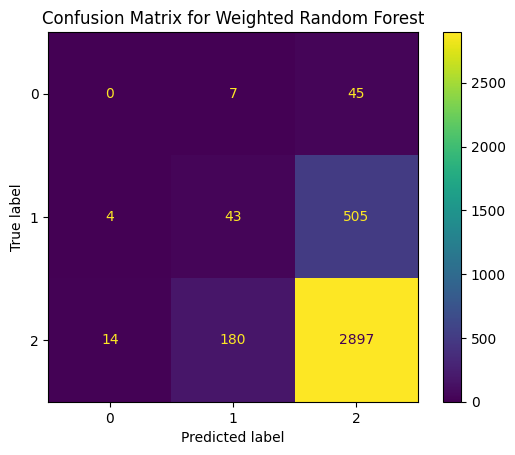

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Calculate accuracy
accuracy_weighted = accuracy_score(y_test, y_pred_rf_weighted)
print(f"Weighted Random Forest Accuracy: {accuracy_weighted:.4f}")

# Generate classification report
report_weighted = classification_report(y_test, y_pred_rf_weighted)
print("Classification Report (Weighted):\n", report_weighted)

# Generate confusion matrix
conf_matrix_weighted = confusion_matrix(y_test, y_pred_rf_weighted)
print("Confusion Matrix (Weighted):\n", conf_matrix_weighted)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_weighted).plot()
plt.title("Confusion Matrix for Weighted Random Forest")
plt.show()


In [11]:
import pickle

# Save the model to a pickle file
model_filename = 'models_pickle_file/weighted_random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(random_forest, file)

print(f"Weighted Random Forest model saved to {model_filename}")


Weighted Random Forest model saved to models_pickle_file/weighted_random_forest_model.pkl


In [12]:
def preprocess_input(input_data, feature_columns):
    # Create a DataFrame from the input_data
    processed_data = pd.DataFrame({
        'Age_band_of_driver': [age_range_mapping[input_data['ageRange']]], 
        'Weather_conditions': [weather_mapping[input_data['weather']]], 
        'Type_of_collision': [collision_mapping[input_data['collision']]], 
        'Driving_experience': [experience_mapping[input_data['experience']]], 
        'Cause_of_accident': [cause_mapping[input_data['cause']]], 
    })

    # One-hot encode and adjust DataFrame as necessary
    processed_data_encoded = pd.get_dummies(processed_data, drop_first=True)

    # Fill missing columns based on training data
    missing_cols = set(feature_columns) - set(processed_data_encoded.columns)
    for col in missing_cols:
        processed_data_encoded[col] = 0
    processed_data_encoded = processed_data_encoded[feature_columns]  # Reorder to match model

    return processed_data_encoded


In [13]:
# One-hot encoding of categorical features for scaling
X_encoded = pd.get_dummies(X, drop_first=True)
scaler.fit(X_encoded)  # Fit scaler on the encoded feature set


StandardScaler()

In [17]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your training data in X_train and y_train
class_weights = {0: 5, 1: 3, 2: 1}  # Adjust based on the data distribution
random_forest = RandomForestClassifier(
    class_weight=class_weights,
    n_estimators=100,
    max_depth=30,
    max_features='log2',
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

# Fit the model
random_forest.fit(X_train_scaled, y_train)

# Save the model to a pickle file
with open('models_pickle_file/weighted_random_forest_model.pkl', 'wb') as f:
    pickle.dump(random_forest, f)

# If you have a scaler, save it as well
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_scaled)

with open('models_pickle_file/scaler_for_weighted_random_forest.pkl', 'wb') as f:
    pickle.dump(scaler, f)
